In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io

plt.rc("font", family=["Helvetica", "Arial"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [15]:
entries_list_sT = os.listdir(r"C:\Users\nicol\Experimentel Physics\Experimentel-Physics-2\Tredje labdag\Glas til luft\s\Datafiler\transmitteret")
entries_list_sR = os.listdir(r"C:\Users\nicol\Experimentel Physics\Experimentel-Physics-2\Tredje labdag\Glas til luft\s\Datafiler\reflekteret")

t1_90 = 90*np.pi/180

def func(x, a):
    return a

d = io.loadmat(r"C:\Users\nicol\Experimentel Physics\Experimentel-Physics-2\Tredje labdag\baggrund måling.mat")
d_offset = d.get("A")
d_offset = np.reshape(d_offset, (len(d_offset)))

t = np.linspace(0, 50, len(d_offset))
mean_Voff, pcovoff = curve_fit(func, t, d_offset, absolute_sigma=True)
usOff = np.sqrt(np.diag(pcovoff))

d = io.loadmat(r"C:\Users\nicol\Experimentel Physics\Experimentel-Physics-2\Tredje labdag\Glas til luft\s - 90 grader med krystal.mat")
d90 = d.get("A")
d90 = np.reshape(d90, (len(d90)))


t = np.linspace(0, 50, len(d90))
mean_V90, pcov90 = curve_fit(func, t, d90, absolute_sigma=True)
us90 = np.sqrt(np.diag(pcov90))
mean_V90 = mean_V90 - mean_Voff


In [16]:
def get_ts_Vs(t, entries):
    if t == "T":
        rempart = "t("
        file_dest = "transmitteret"
    else:
        rempart = "r("
        file_dest = "reflekteret"
        
    ts = np.zeros((len(entries), 2))
    Vs = np.zeros((len(entries),2))
    for i, file in enumerate(entries):
        name = file.replace(rempart, "")
        name = name.replace(".mat", "")
        name = name.replace(")", "")
        indx = name.find(",")
        ts12 = float(name[0:indx])*np.pi/180, float(name[indx + 1:len(name)])*np.pi/180
        ts[i] = ts12
        
    for i, file in enumerate(entries):
        dat = io.loadmat(f"C:/Users/nicol/Experimentel Physics/Experimentel-Physics-2/Tredje labdag/Glas til luft/s/Datafiler/{file_dest}/{file}")
        V = dat.get("A")
        V = np.reshape(V, (len(V)))
        xs = np.linspace(0, 50, len(V))
        fitted, pcov = curve_fit(func, xs, V, absolute_sigma=True)
        perr1 = np.sqrt(np.diag(pcov))
        Vs[i][0] = fitted - mean_Voff
        Vs[i][1] = perr1
        
    return Vs, ts

In [17]:
mean_VsT, ts_trans = get_ts_Vs("T", entries_list_sT)
mean_VsR, ts_ref = get_ts_Vs("R", entries_list_sR)

In [18]:
Ts = mean_VsT/mean_V90
Rs = mean_VsR/mean_V90

[0.17453293 0.26179939 0.29670597 0.34906585 0.38397244 0.43633231
 0.4712389  0.50614548 0.54105207 0.57595865 0.61086524 0.64577182
 0.68067841 0.71558499]


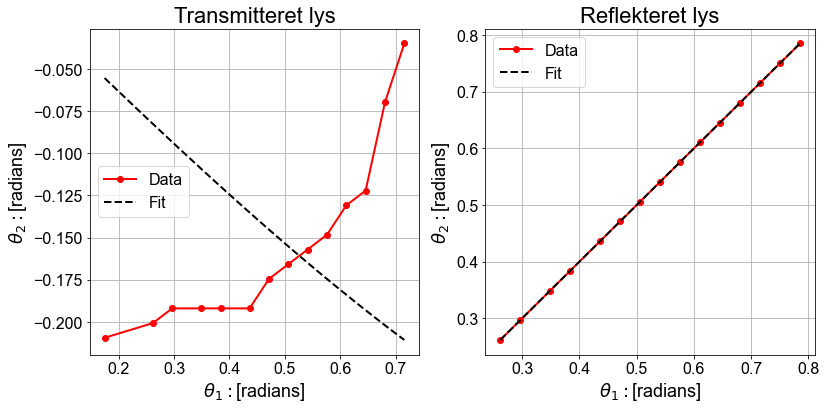

In [40]:
fig, axs = plt.subplots(1,2, figsize=(13,6))
axs[1].set_title("Reflekteret lys")
axs[0].set_title("Transmitteret lys")

def snell(theta, n):
    theta_ag = np.arcsin(n*np.sin(theta))
    return theta_ag

theta1T = np.zeros(len(ts_trans))
theta2T = np.zeros(len(ts_trans))

theta1R = np.zeros(len(ts_ref))
theta2R = np.zeros(len(ts_ref))

i = 0
for t1, t2 in ts_trans:
    theta1T[i] = t1
    theta2T[i] = t2 - t1
    i = i + 1
    
i = 0
for t1, t2 in ts_ref:
    theta1R[i] = t1
    theta2R[i] = t1
    i = i + 1
    
theta1T1 = theta1T[0:len(theta1T)-3]
theta2T1 = theta2T[0:len(theta2T)-3]

print(theta1T1)
axs[0].plot(np.sort(theta1T1), np.sort(theta2T1), 'o-', c='r', lw=2, label="Data")
axs[1].plot(np.sort(theta1R), np.sort(theta2R), 'o-', c='r', lw=2, label="Data")

nT, pcovT = curve_fit(snell, theta1T1, theta2T1, absolute_sigma=True)
nR, pcovR = curve_fit(snell, theta1R, theta2R, absolute_sigma=True)

theta_T = np.linspace(min(theta1T1), max(theta1T1))
theta_R = np.linspace(min(theta1R), max(theta1R))

axs[0].plot(theta_T, snell(theta_T, nT), c='k', ls="--", label="Fit", lw=2)
axs[1].plot(theta_R, snell(theta_R, nR), c='k', ls="--", label="Fit", lw=2)

for ax in axs:
    ax.grid()
    ax.set_xlabel(r"$\theta_1: $[radians]")
    ax.set_ylabel(r"$\theta_2: $[radians]")
    ax.legend()


In [32]:
print(nR, nT)

[1.] [-0.31882822]


17
17


<ipython-input-20-007d0193e306>:12: RuntimeWarning: invalid value encountered in arcsin
  theta_2 = np.arcsin(n_komb*np.sin(theta_1))
<ipython-input-20-007d0193e306>:7: RuntimeWarning: invalid value encountered in arcsin
  theta_2 = np.arcsin(n_komb*np.sin(theta_1)) #Indsæt kombination af brydningsindekser, så det passer med f.eks. ns = n_a/n_g, eller omvendt
<ipython-input-20-007d0193e306>:12: RuntimeWarning: invalid value encountered in arcsin
  theta_2 = np.arcsin(n_komb*np.sin(theta_1))
<ipython-input-20-007d0193e306>:7: RuntimeWarning: invalid value encountered in arcsin
  theta_2 = np.arcsin(n_komb*np.sin(theta_1)) #Indsæt kombination af brydningsindekser, så det passer med f.eks. ns = n_a/n_g, eller omvendt


Text(0, 0.5, 'R')

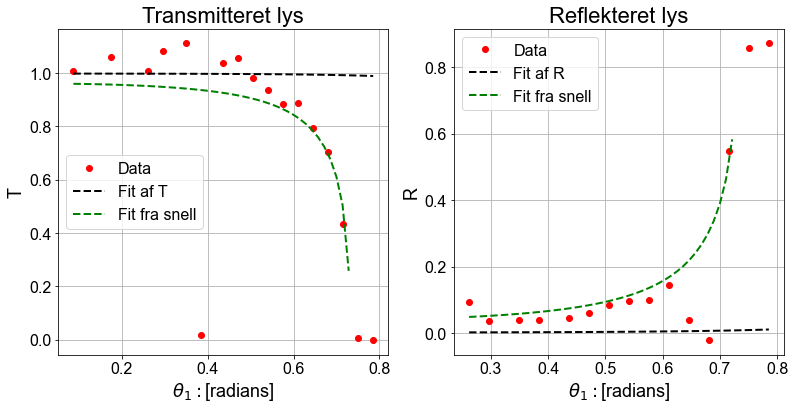

In [20]:
fig, axs = plt.subplots(1,2, figsize=(13,6))
axs[1].set_title("Reflekteret lys")
axs[0].set_title("Transmitteret lys")


def Rkoef(theta_1, n_komb): #Gælder kun for S polariseret lys
    theta_2 = np.arcsin(n_komb*np.sin(theta_1)) #Indsæt kombination af brydningsindekser, så det passer med f.eks. ns = n_a/n_g, eller omvendt
    R_s = 1 - np.sin(2*theta_1)*np.sin(2*theta_2)/(np.sin(theta_1 + theta_2)**2) #np.sin(theta_1 - theta_2)**2/(np.sin(theta_1 + theta_2)**2)
    return R_s

def Tkoef(theta_1, n_komb): #Gælder kun for S polariseret lys
    theta_2 = np.arcsin(n_komb*np.sin(theta_1))
    T_s = 1 - np.sin(theta_1 - theta_2)**2/(np.sin(theta_1 + theta_2)**2) #np.sin(2*theta_1)*np.sin(2*theta_2)/(np.sin(theta_1 + theta_2)**2)
    return T_s

Tl = [] #Fjerner vinkler og punkter, hvor T,R ikke ligger mellem intervallet [0,1]
Rl = []
theta_newT = []
theta_newR = []

for i, a in enumerate(Ts):
    #if a[0] > 0 and a[0] < 1: #Fjerner dem her
        Tl.append(a[0])
        theta_newT.append(theta1T[i])

for i, a in enumerate(Rs):
    #if a[0] > 0 and a[0] < 1:
        Rl.append(a[0])
        theta_newR.append(theta1R[i])

print(len(Tl))
print(len(theta_newT))

nTT, pcovnT = curve_fit(Tkoef, theta_newT, Tl, absolute_sigma=True)
nRR, pcovnR = curve_fit(Rkoef, theta_newR, Rl, absolute_sigma=True)

theta_T = np.linspace(min(theta_newT), max(theta_newT))
theta_R = np.linspace(min(theta_newR), max(theta_newR))

axs[0].plot(theta_newT, Tl, 'o', c='r', label="Data")
axs[1].plot(theta_newR, Rl, 'o', c='r', label="Data")

axs[0].plot(theta_T, Tkoef(theta_T, nTT), ls="--", c="k", lw=2, label="Fit af T")
axs[1].plot(theta_R, Rkoef(theta_R, nRR), ls="--", c="k", lw=2, label="Fit af R")

axs[0].plot(theta_T, Tkoef(theta_T, 1.497), ls="--", c="g", lw=2, label="Fit fra snell")
axs[1].plot(theta_R, Rkoef(theta_R, 1.497), ls="--", c="g", lw=2, label="Fit fra snell")


for ax in axs:
    ax.grid()
    ax.legend()
    ax.set_xlabel(r"$\theta_1: $[radians]")
axs[0].set_ylabel(r"T")
axs[1].set_ylabel(r"R")

In [21]:
print(nTT, nRR)

[1.10000002] [1.10000002]


In [22]:
#Samlet gennemsnit af brydningsindekser:
n4 = (nRR + 1/nT + nRR)/3
print(n4)


NameError: name 'nT' is not defined

In [ ]:
#Kan ikke fitte et passende brydningsindeks til ovenstående, fordi vi løber ind i noget underligt data